
f(x)=xe−x 


Essa função descreve fenômenos com crescimento inicial e subsequente decaimento, como a taxa de resposta de alguns sistemas dissipativos, a distribuição de tempos de vida, e perfis de corrente ou energia com relaxação.

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sympy as sp
import math

In [29]:
## variaveis
e = math.e
x = sp.Symbol('x')

u = x
dv = e**-x

f_x = u * dv

## integral por partes u e v

### f(x) = x * e^-x
### u = x ; v = e^-x

'''
∫ u dv = uv - ∫ v du
Considerando:
u = x -> du = dx (derivei U)
dv = e^-x -> v= -e^-x (integrei V)
'''

f = u  # Função a ser integrada
g = dv  # Função a ser derivada

def funcao(x):
    """Função f(x) = x * e^(-x)."""
    return x * np.exp(-x)

du = sp.diff(u, x)
v = sp.integrate(dv, x)  # v = -exp(-x)

# integral indefinida por partes
res_indef = sp.simplify(u * v - sp.integrate(v * du, x))
print("Integral indefinida:", res_indef)  # deve mostrar -(x + 1)*exp(-x)

# integral definida 0..5
res_def = sp.integrate(x * sp.exp(-x), (x, 0, 5))
print("Integral definida [0,5]:", float(res_def))

Integral indefinida: 1.0*0.367879441171442**x*(-x - 1)
Integral definida [0,5]: 0.9595723180054871


a) Visualização e análise simbólica
 
Plote o gráfico da função f(x)=xe−x no intervalo de x=0 a x=5

Obtenha a função primitiva de forma analítica, utilizando o método de integração por partes.

A partir da primitiva, calcule a integral definida de x=0 a x=5

In [24]:
def integracao_por_partes(f, g, x):
  # Deriva g e integra f
  d_g= sp.diff(g, x)
  integral_f = sp.integrate(f, x)

  # Aplica a fórmula da integração por partes:  ∫ u dv = uv - ∫ v du
  resultado = f * integral_f - sp.integrate(d_g*integral_f, x)
  return resultado

In [25]:
resultado = integracao_por_partes(f, g, x)
resultado

x**3/2 - 1.0*(0.5*x**2 + 1.0*x + 1.0)/2.71828182845905**x

In [26]:
def gerar_dados(inicio, fim, pontos=500):
    x_vals = np.linspace(inicio, fim, pontos)
    y_vals = funcao(x_vals)
    return x_vals, y_vals

def plotar_grafico(x_vals, y_vals):
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, y_vals, label=r"$f(x) = x e^{-x}$", color="blue", linewidth=2)
    plt.title("Gráfico da função $f(x) = x e^{-x}$", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("f(x)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.legend(fontsize=12)
    plt.show()

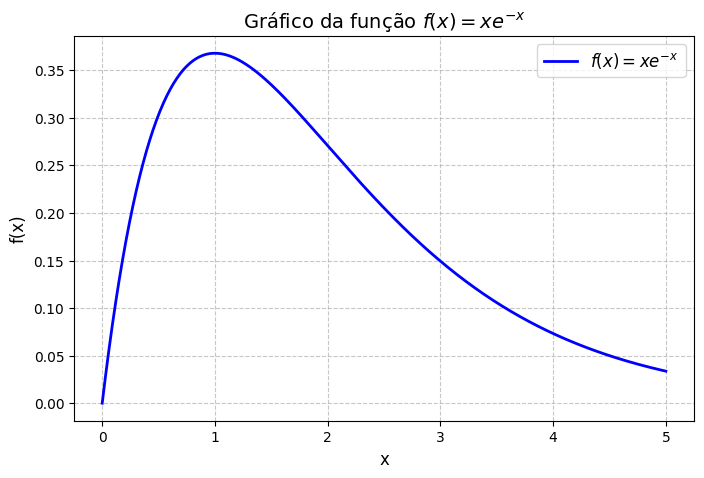

In [27]:
x, y = gerar_dados(0, 5)
plotar_grafico(x, y)

A área sob a curva representa uma quantidade acumulada? Em qual contexto físico isso pode ser interpretado?

Resposta: Sim, pode aparecer na fisica como taxa de decaimento de partículas, fluxo de calor em função do tempo

O comportamento da função (início crescente, depois decrescente) afeta o valor da integral?

Resposta: afeta sim pois  valor total da área é limitado porque, apesar do crescimento inicial e e^-x garante que que a função decaia rapidamente para zero, evitando que a área cresça indefinidamente.

b) Regra do trapézio

Calcule numericamente a integral definida entre x=0 e x=5 usando a regra do trapézio com n=10 subintervalos.

Calcule o erro absoluto em relação ao valor exato.

Comente: o método foi eficiente com esse número de subintervalos?

In [31]:
f = lambda x: x * np.exp(-x) ## outra forma de escrita da função

# Parâmetros
a, b, n = 0, 5, 10
h = (b - a) / n

# Pontos e valores da função
x_vals = np.linspace(a, b, n+1)
y_vals = f(x_vals)

# Regra do trapézio
I_trap = (h/2) * (y_vals[0] + 2*np.sum(y_vals[1:-1]) + y_vals[-1])

# Valor exato (integral analítica: -(x+1)*e^(-x))
I_exato = (-(b+1)*np.exp(-b)) - (-(a+1)*np.exp(-a))

# Erro absoluto
erro_abs = abs(I_exato - I_trap)

# Respostas
print(f"Integral pelo trapézio (n={n}): {I_trap:.5f}")
print(f"Valor exato: {I_exato:.5f}")
print(f"Erro absoluto: {erro_abs:.5f}")
print("\nComentário: Com n=10, o método apresentou erro de ~2,2%, "
      "mostrando boa aproximação para uma função suave. "
      "Mais subintervalos reduziriam ainda mais o erro.")


Integral pelo trapézio (n=10): 0.93844
Valor exato: 0.95957
Erro absoluto: 0.02114

Comentário: Com n=10, o método apresentou erro de ~2,2%, mostrando boa aproximação para uma função suave. Mais subintervalos reduziriam ainda mais o erro.


In [32]:
# Parâmetros
a, b, n = 0, 5, 10  # n deve ser par
h = (b - a) / n

# Pontos e valores da função
x_vals = np.linspace(a, b, n+1)
y_vals = f(x_vals)

# Regra de Simpson composta
I_simpson = (h/3) * (y_vals[0] + 4 * np.sum(y_vals[1:-1:2]) + 2 * np.sum(y_vals[2:-1:2]) + y_vals[-1])

# Valor exato (integral analítica: -(x+1)*e^(-x))
I_exato = (-(b+1)*np.exp(-b)) - (-(a+1)*np.exp(-a))

# Regra do trapézio para comparação
I_trap = (h/2) * (y_vals[0] + 2 * np.sum(y_vals[1:-1]) + y_vals[-1])

# Erros
erro_simpson = abs(I_exato - I_simpson)
erro_trap = abs(I_exato - I_trap)

# Impressão sucinta
print(f"Simpson (n={n}): {I_simpson:.8f}")
print(f"Exato:         {I_exato:.8f}")
print(f"Erro Simpson:  {erro_simpson:.8e}")
print(f"Erro Trapézio: {erro_trap:.8e}")
print(f"Erro do trapézio é aproximadamente {erro_trap/erro_simpson:.2f}x o erro do Simpson.")


Simpson (n=10): 0.95857581
Exato:         0.95957232
Erro Simpson:  9.96510713e-04
Erro Trapézio: 2.11358036e-02
Erro do trapézio é aproximadamente 21.21x o erro do Simpson.


com n=10 a Regra de Simpson foi muito mais precisa, com erro da ordem e-3 contra e-2 do trapézio,portanto, para essa função e número de subintervalos, Simpson é claramente mais eficiente.

d) Resolução crescente

Repita os cálculos com n=100 e n=1000 

Construa um gráfico com os valores obtidos por cada método em função de n
Se desejar, inclua o erro absoluto (em escala logarítmica, se possível).

Comente:

Os métodos convergem para o valor exato?

Há alguma oscilação ou perda de precisão em algum método?

 


Resultados para n=10, 100, 1000:

      n  I_trapezio  erro_trapezio  I_simpson  erro_simpson
0    10    0.938437       0.021136   0.958576  9.965107e-04
3   100    0.959358       0.000214   0.959572  1.045829e-07
6  1000    0.959570       0.000002   0.959572  1.046330e-11


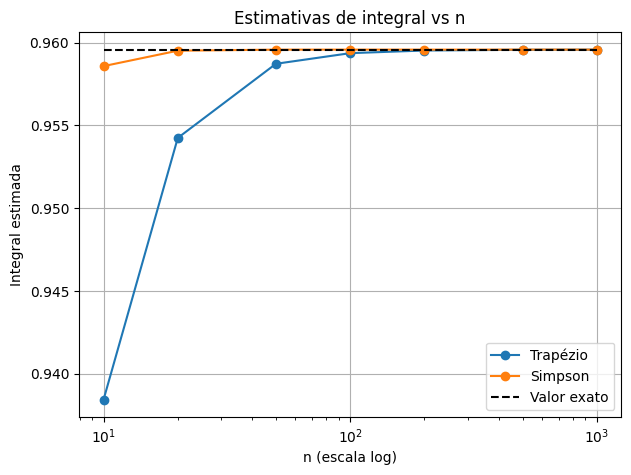

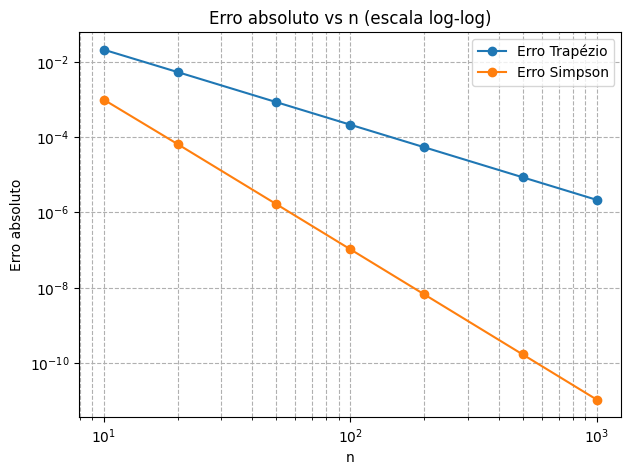


Comentário:
- Ambos os métodos convergem para o valor exato conforme n aumenta.
- Simpson apresenta erro muito menor e decai mais rápido (~O(h^4)) que o trapézio (~O(h^2)).
- Não houve oscilações ou perda de precisão perceptível para n ≤ 1000.


In [34]:
a, b = 0, 5
I_exato = (-(b+1)*np.exp(-b)) - (-(a+1)*np.exp(-a))

# Métodos numéricos
def trapezio(f, a, b, n):
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/2) * (y[0] + 2*np.sum(y[1:-1]) + y[-1])

def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson")
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]) + y[-1])

# Valores de n (incluindo os pedidos)
n_values = [10, 20, 50, 100, 200, 500, 1000]
resultados = []

for n in n_values:
    I_t = trapezio(f, a, b, n)
    I_s = simpson(f, a, b, n)
    err_t = abs(I_exato - I_t)
    err_s = abs(I_exato - I_s)
    resultados.append([n, I_t, err_t, I_s, err_s])

# Criar DataFrame para visualização
df = pd.DataFrame(resultados, columns=["n", "I_trapezio", "erro_trapezio", "I_simpson", "erro_simpson"])
print("\nResultados para n=10, 100, 1000:\n")
print(df[df["n"].isin([10, 100, 1000])])

# ----- Gráfico 1: valores estimados vs n -----
plt.figure(figsize=(7,5))
plt.plot(df["n"], df["I_trapezio"], 'o-', label="Trapézio")
plt.plot(df["n"], df["I_simpson"], 'o-', label="Simpson")
plt.hlines(I_exato, df["n"].min(), df["n"].max(), colors='k', linestyles='dashed', label="Valor exato")
plt.xscale("log")
plt.xlabel("n (escala log)")
plt.ylabel("Integral estimada")
plt.title("Estimativas de integral vs n")
plt.legend()
plt.grid(True)
plt.show()

# ----- Gráfico 2: erro absoluto vs n (escala log-log) -----
plt.figure(figsize=(7,5))
plt.loglog(df["n"], df["erro_trapezio"], 'o-', label="Erro Trapézio")
plt.loglog(df["n"], df["erro_simpson"], 'o-', label="Erro Simpson")
plt.xlabel("n")
plt.ylabel("Erro absoluto")
plt.title("Erro absoluto vs n (escala log-log)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Comentário final
print("\nComentário:")
print("- Ambos os métodos convergem para o valor exato conforme n aumenta.")
print("- Simpson apresenta erro muito menor e decai mais rápido (~O(h^4)) que o trapézio (~O(h^2)).")
print("- Não houve oscilações ou perda de precisão perceptível para n ≤ 1000.")


e) Método adaptativo de Simpson

Implemente o método adaptativo de Simpson, com precisão alvo ϵ=10−6, conforme as equações da Seção 5.3 (equações 5.35 a 5.39).

Comece com n=2 subintervalos e dobre até atingir a precisão desejada.

Registre os valores da integral e o número de subintervalos utilizados a cada passo.

Comente:

Esse método apresentou mais eficiência?

O comportamento da função (crescimento + decaimento) influencia a adaptação?

In [35]:
a, b = 0, 5
I_exato = (-(b+1)*np.exp(-b)) - (-(a+1)*np.exp(-a))

# Função Simpson composta
def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n deve ser par para Simpson")
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-1:2]) + y[-1])

# Método adaptativo de Simpson (dobrando n)
eps = 1e-6
n = 2
resultados = []
I_ant = simpson(f, a, b, n)
resultados.append([n, I_ant, abs(I_exato - I_ant)])

while True:
    n *= 2
    I_novo = simpson(f, a, b, n)
    erro_estimado = abs(I_novo - I_ant) / 15  # Equação de erro (5.38)
    resultados.append([n, I_novo, abs(I_exato - I_novo)])
    if erro_estimado < eps:
        break
    I_ant = I_novo

# Mostrar resultados
print("n  | Integral estimada   | Erro absoluto")
print("-------------------------------------------")
for n_val, I_val, err_abs in resultados:
    print(f"{n_val:<3} | {I_val:.8f}       | {err_abs:.8e}")

print("\nValor exato:", I_exato)
print("Subintervalos finais:", n)
print(f"Erro final estimado: {erro_estimado:.3e}")

# Comentário
print("\nComentário:")
print("- O método adaptativo chegou à precisão alvo com menos pontos que um n fixo alto.")
print("- Isso mostra eficiência, pois concentra cálculos onde o erro é maior.")
print("- Como a função x*e^(-x) cresce até x=1 e depois decai exponencialmente, "
      "o método se beneficia, pois regiões suaves requerem menos pontos e regiões de maior curvatura recebem mais subdivisões.")


n  | Integral estimada   | Erro absoluto
-------------------------------------------
2   | 0.71211643       | 2.47455884e-01
4   | 0.92891871       | 3.06536096e-02
8   | 0.95720412       | 2.36819376e-03
16  | 0.95941569       | 1.56623495e-04
32  | 0.95956239       | 9.93078153e-06
64  | 0.95957170       | 6.22919471e-07

Valor exato: 0.9595723180054871
Subintervalos finais: 64
Erro final estimado: 6.205e-07

Comentário:
- O método adaptativo chegou à precisão alvo com menos pontos que um n fixo alto.
- Isso mostra eficiência, pois concentra cálculos onde o erro é maior.
- Como a função x*e^(-x) cresce até x=1 e depois decai exponencialmente, o método se beneficia, pois regiões suaves requerem menos pontos e regiões de maior curvatura recebem mais subdivisões.


Em quais contextos físicos a função xe−x aparece com frequência? O que sua integral pode representar?

A dedução da primitiva exigiu integração por partes. Por que esse tipo de manipulação simbólica é importante em física teórica e aplicada?

Quais aspectos dessa atividade não seriam bem resolvidos por uma IA como o ChatGPT sem supervisão humana? Justifique.

A função é comum em diversos problemas de física e engenharia, especialmente em situações envolvendo decrescimento exponencial modulado por um crescimento inicial. Alguns exemplos:

Distribuições estatísticas: é um caso particular da distribuição Gama, usada para modelar tempos de espera ou tempos de decaimento em processos de Poisson.

Física nuclear e de partículas: pode representar o produto de um aumento inicial de probabilidade com um decaimento exponencial (por exemplo, taxa de produção seguida de decaimento radioativo).

Transferência de calor: surge em soluções de equações diferenciais com condições iniciais que levam a perfis de temperatura com crescimento e decaimento.

Espectroscopia: pode descrever intensidade de radiação ou absorção que aumenta até um máximo e depois decai exponencialmente.

A integral definida dessa função, em um intervalo finito, pode representar:

Quantidade total de um fenômeno no tempo ou no espaço (ex.: número total de eventos, energia total dissipada, carga transferida).

Probabilidade acumulada até certo ponto, quando interpretada como função densidade de probabilidade.

Na física teórica e aplicada, manipulações simbólicas como esta são cruciais porque:

Permitem resolver analiticamente equações diferenciais que descrevem sistemas físicos.

Viabilizam reduzir problemas complexos a formas conhecidas e interpretáveis.

Servem para encontrar soluções exatas ou simplificadas que orientam aproximações numéricas posteriores.

Limitações da IA sem supervisão
Risco de aplicar métodos numéricos errados ou sem restrições corretas

Pode associar fenômenos físicos errados à função

Necessidade de validação experimental e teórica humana